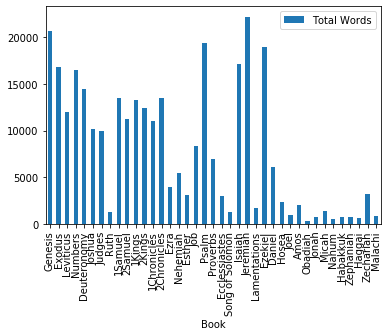

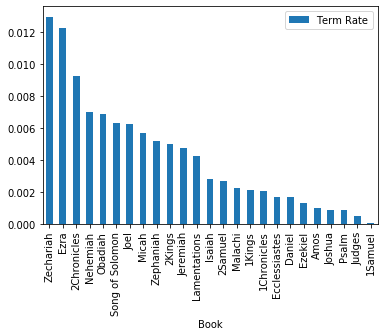

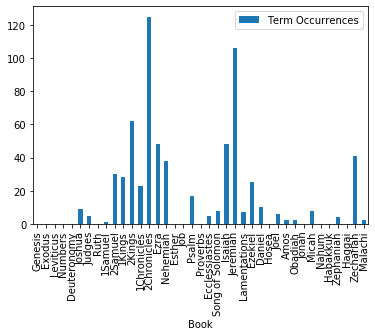

468.06969696969696


,Book,Term Occurrences,Total Words,Term Rate,Term Frequency
37,Zechariah,41,3157,0.012987,77.000000
14,Ezra,48,3915,0.012261,81.562500
13,2Chronicles,125,13483,0.009271,107.864000
15,Nehemiah,38,5443,0.006981,143.236842
30,Obadiah,2,291,0.006873,145.500000
21,Song of Solomon,8,1266,0.006319,158.250000
28,Joel,6,960,0.006250,160.000000
32,Micah,8,1409,0.005678,176.125000
35,Zephaniah,4,771,0.005188,192.750000
11,2Kings,62,12412,0.004995,200.193548


In [11]:
import pandas as pd
import codecs
import re
import matplotlib.pyplot as plt
import collections
def CleanHebrew(l):
    wrong = ['ויחננו\u202a','הירצך\u202a']
    right = ['ויחננו','הירצך']
    for i in range(len(wrong)):
        if wrong[i] in l:
            ind = l.index(wrong[i])
            l[ind] = right[i]
    return l
def StringCount(key,tlist):
    txt = ''.join(tlist)
    key1 = ''.join(key.split())
    c = txt.count(key1)
    return c
    
def PhraseCount(string,tlist):
    Same = False
    c = 0
    l1 = string.split()
    len1 = len(l1)
    len2 = len(tlist)
    for x in range(len2):
        if tlist[x] == l1[0]:
            for i in range(len1-1):
                Same = False
                if tlist[x+i+1] == l1[i+1]:
                    Same = True
            if Same is True:
                print(x)
                c+=1
    return c    
def IsHebrew(string):
    '''
    Takes a string and returns whether it is Hebrew text as a Boolean value. If the string begins and ends with a hebrew character it is considered to be hebrew.
    '''
    HEBREW = False
    heb = ['ו','ת','ם','צ','ב','ל','ג','א','ב','ג','ד','ה','ו','ז','ח','ט','י','כ','ך','ל','מ','ם','נ','ן','ס','ע','פ','ף','צ','ץ','ק','ר','ש','ת']
    s=0
    a=0
    for i in heb:
        if string.endswith(i):
            s+=1
        if string.startswith(i):
            s+=1
        a+=1
    if s == 1:
        print(string)
        print(len(string))
        print(len(string.strip()))
    if s > 1:
        HEBREW = True
    return HEBREW        
def TxtToHebList(txtfile):
    '''
    Takes a UTF-8 .txt file and compiles and returns a list of all hebrew words in the file
    '''
    mal = codecs.open(txtfile,'r','utf8')
    mal1 = mal.read()
    mal3 = len(mal1)
    #print(mal3)
    malx = mal1.replace(r"/"," ").replace("["," ").replace("]"," ").replace("*"," ").replace("\u202a"," ")
    maly = malx.split()
    mal4 = maly
    len1 = len(mal4)
    for n in mal4:
        n.strip()
    mal5= list([])
    i = -1
    for w in mal4:
        i += 1
    
        if IsHebrew(mal4[i]) == True:
            mal5.append(mal4[i])
            continue
        else:
            mal4.pop(i)
    return mal5

Filenames = ['Gen.txt','Exodus.txt','Lev.txt','Num.txt','Deut.txt','Josh.txt','Judg.txt','Ruth.txt','1Sam.txt','2Sam.txt','1Kings.txt','2Kings.txt','1Chr.txt','2Chr.txt','Ezra.txt','Neh.txt','Esth.txt','Job.txt','Ps.txt','Prov.txt','Eccl.txt','Song.txt','Isa.txt','Jer.txt','Lam.txt','Ezek.txt','Dan.txt','Hos.txt','Joel.txt','Am.txt','Ob.txt','Jon.txt','Mic.txt','Nah.txt','Hab.txt','Zeph.txt','Hag.txt','Zech.txt','Mal.txt']
Bible = []
for n in Filenames:
    x = TxtToHebList(n)
    Bible.append(x)
WordCount = []    
for x in range(39):
    WordCount.append(len(Bible[x]))
#print(PhraseCount('יהוה צבאות',Bible[38]))
#for n,l in enumerate(Bible[38]):
    #print(n,l)
Books = ['Genesis','Exodus','Leviticus','Numbers','Deuteronomy','Joshua','Judges','Ruth','1Samuel','2Samuel','1Kings','2Kings','1Chronicles','2Chronicles','Ezra','Nehemiah','Esther','Job','Psalm','Proverbs','Ecclessiastes','Song of Solomon','Isaiah','Jeremiah','Lamentations','Ezekiel','Daniel','Hosea','Joel','Amos','Obadiah','Jonah','Micah','Nahum','Habakkuk','Zephaniah','Haggai','Zechariah','Malachi']
TzCount = []
TzRate = []
TzFreq = []
for x in range(39):
    TzCount.append(StringCount('ירושלם',Bible[x]))
    try:
        TzRate.append((TzCount[x] / WordCount[x]))
    except ZeroDivisionError:
        TzRate.append(0)
    try:
        TzFreq.append(( WordCount[x] / TzCount[x]))
    except ZeroDivisionError:
        TzFreq.append(0)
#for x in range(39):
    #print(Books[x],TzCount[x]," ",WordCount[x]," ",TzRate[x])
    
OT = [('Book',Books),
     ('Term Occurrences',TzCount),
     ('Total Words',WordCount),
     ('Term Rate',TzRate),
     ('Term Frequency',TzFreq), 
     ]
data = pd.DataFrame.from_dict(collections.OrderedDict(OT))
df = data[(data !=0).all(1)].copy()
df1 = df.sort_values(by = 'Term Rate', ascending = False).copy()
data.plot(kind='bar',x='Book',y='Total Words')
plt.show()
df1.plot(kind='bar',x='Book',y='Term Rate')
plt.show()
df1.head()
data.plot(kind='bar',x='Book',y='Term Occurrences')
plt.show()
df1
TotalTzRate = sum(WordCount)/sum(TzCount)

print(TotalTzRate)
df1